In [1]:
import pandas as pd 

In [2]:
def read_group(file_name , groups_folder= "../plots/groups/"):
    groups = pd.read_csv(f"{groups_folder}{file_name}",index_col=0)
    groups.drop(["size","depth"],axis=1,inplace=True)
    groups["itemsets"] = groups["itemsets"].apply(lambda x : [int(i) for i in x.split()])
    
    groups["user_ids"] = groups["user_ids"].apply(lambda x : [int(i) for i in x[1:-1].split(",")])
    groups["itemset_name"] = groups["itemset_name"].apply(lambda x : [i.strip() for i in x[1:-1].split(",")])
    
    return groups

def splited_links(file_name):
    links = pd.read_csv(f"../plots/links/{file_name}")
    res = []
    links.apply(lambda x : [res.append((x["source"],x["target"], int(i) )) for i in x["user_id"].split(",")] ,axis=1)
    return  pd.DataFrame(res,columns=["source","target","user_id"])

def count_consecutives(x):
    return x.groupby((x!=x.shift()).cumsum()).transform("size")

def read_users_file():
    users = pd.read_csv("../datasets/Total/users.csv",sep=";")
    users.columns =columns=["user_id","sex","age","departement"]
    return users 

users = read_users_file()

In [6]:
file_name = 'M-3-[1-None]-[AGE]-lcm.out'
file = file_name.split("-")[0]
customers_target = set([955120,563868,172457,963615,149886,173319,203487,318322,923982,181027])

Text(0, 0.5, '% of customers ')

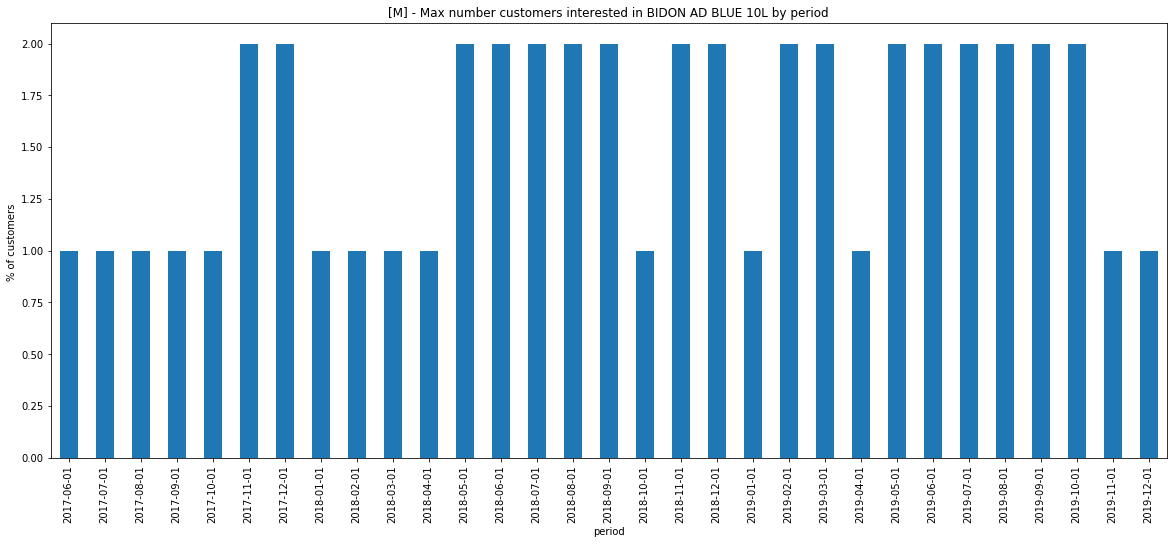

In [14]:

stats_df = pd.DataFrame()
groups = read_group(file_name)

groups_target = groups[groups.apply(lambda x : customers_target.intersection(x["user_ids"])!= set(),axis=1)]
groups_target.loc[groups_target.index,"target_customers"] = groups_target.user_ids.apply(lambda x : len(customers_target.intersection(x)))


product1 = groups_target.itemsets.apply(lambda x : 4125 in x)
product2 = groups_target.itemsets.apply(lambda x : 431 in x)
product3 = groups_target.itemsets.apply(lambda x : 4074 in x)


stats_df = groups_target[product3].groupby("period").target_customers.max()
ax = stats_df.plot.bar(figsize=(20,8),title=f"[{file}] - Max number customers interested in BIDON AD BLUE 10L by period")
ax.set_ylabel("% of customers ")